In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Part 1 - Building the CNN

In [2]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
# Initializing the CNN
classifier = Sequential()

**Step 1 - Convolution**

In [0]:
classifier.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))


Instructions for updating:
Colocations handled automatically by placer.


**Step 2 - Pooling**

In [0]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [0]:
# Adding a secnd convolutional layer 
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))


** Step 3 - Flattening **

In [0]:
classifier.add(Flatten())

** Step 4 - Full connection **

In [0]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [0]:
#Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                   horizontal_flip = True)


In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)



In [0]:
training_set = train_datagen.flow_from_directory('drive/My Drive/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8006 images belonging to 2 classes.


In [0]:
test_set = test_datagen.flow_from_directory('drive/My Drive/dataset/test_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [0]:
classifier.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 25,
                         validation_data = test_set,
                         nb_val_samples = 2000)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=250, epochs=25, validation_steps=2000)`
  """


Epoch 1/25
250/250 [==============================] - 2822s 11s/step - loss: 0.6606 - acc: 0.6018 - val_loss: 0.6032 - val_acc: 0.6907
Epoch 2/25
250/250 [==============================] - 325s 1s/step - loss: 0.5941 - acc: 0.6784 - val_loss: 0.6056 - val_acc: 0.6858
Epoch 3/25
250/250 [==============================] - 324s 1s/step - loss: 0.5514 - acc: 0.7198 - val_loss: 0.5357 - val_acc: 0.7385
Epoch 4/25
250/250 [==============================] - 325s 1s/step - loss: 0.5272 - acc: 0.7348 - val_loss: 0.5557 - val_acc: 0.7423
Epoch 5/25
250/250 [==============================] - 325s 1s/step - loss: 0.5107 - acc: 0.7492 - val_loss: 0.4962 - val_acc: 0.7683
Epoch 6/25
250/250 [==============================] - 325s 1s/step - loss: 0.4877 - acc: 0.7615 - val_loss: 0.5597 - val_acc: 0.7239
Epoch 7/25
250/250 [==============================] - 325s 1s/step - loss: 0.4855 - acc: 0.7592 - val_loss: 0.4763 - val_acc: 0.7702
Epoch 8/25
250/250 [==============================] - 325s 1s/step 

# Part 3 - Making new predictions

In [0]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('drive/My Drive/dataset/prediction/cat_or_dog_1.png')

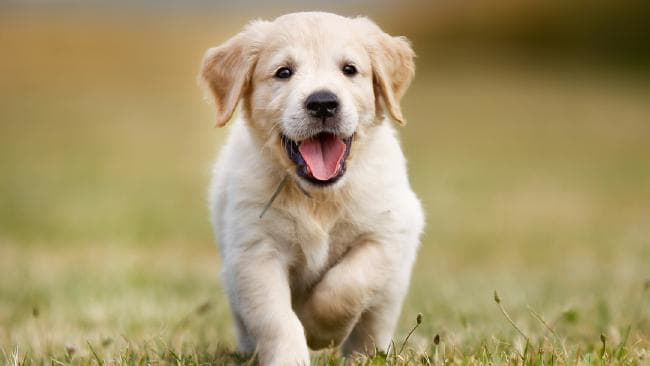

In [0]:
test_image

In [0]:
test_image = image.load_img('drive/My Drive/dataset/prediction/cat_or_dog_1.jpg', target_size = (64, 64))

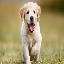

In [0]:
test_image

In [0]:
test_image = image.img_to_array(test_image)

In [0]:
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

In [0]:
result

array([[1.]], dtype=float32)

In [0]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [0]:
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

  
prediction

'dog'